<a href="https://colab.research.google.com/github/rezve66/Alternaria-Destruens-Research/blob/main/Diversity%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

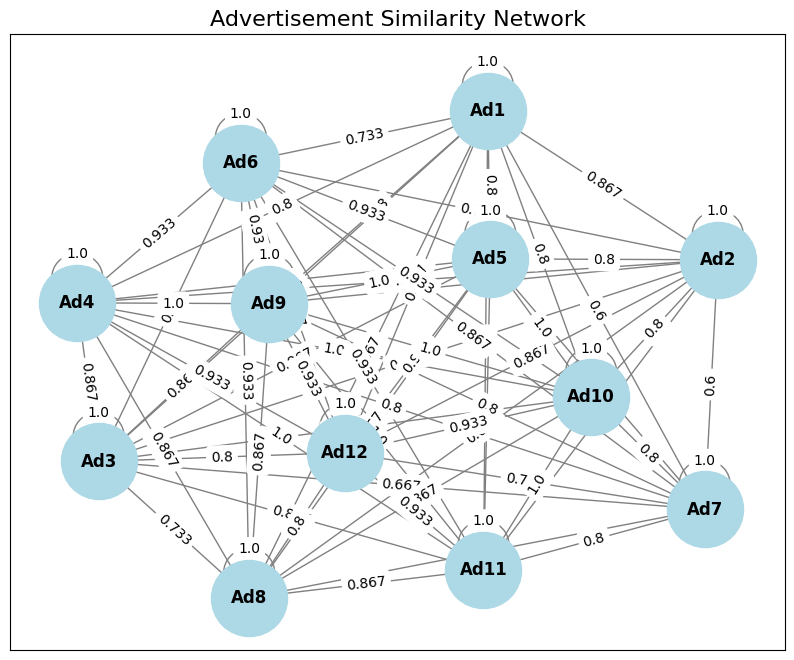

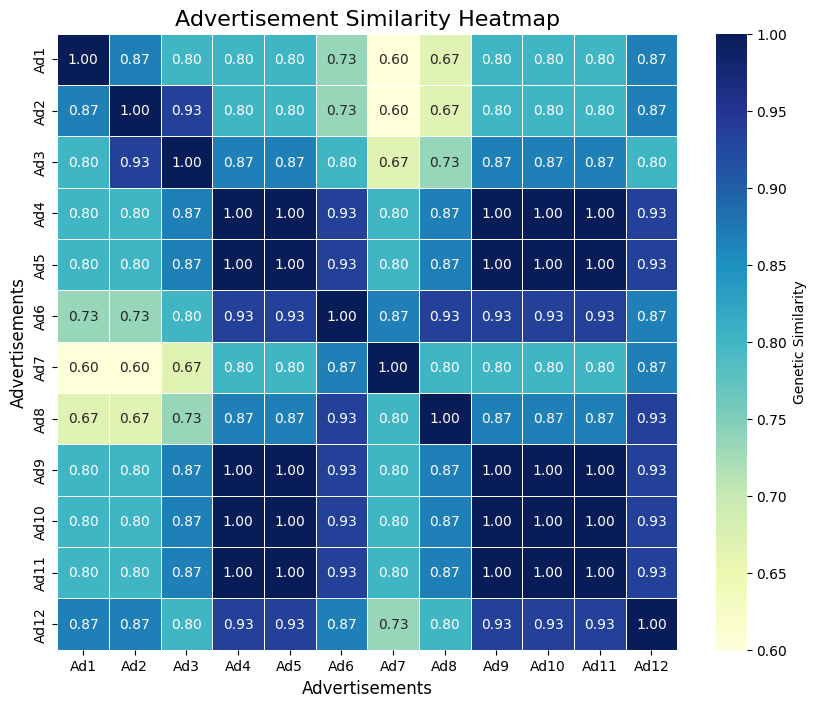

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame with the similarity data
data = [
    [1.00, 0.867, 0.800, 0.800, 0.800, 0.733, 0.600, 0.667, 0.800, 0.800, 0.800, 0.867],
    [0.867, 1.00, 0.933, 0.800, 0.800, 0.733, 0.600, 0.667, 0.800, 0.800, 0.800, 0.867],
    [0.800, 0.933, 1.00, 0.867, 0.867, 0.800, 0.667, 0.733, 0.867, 0.867, 0.867, 0.800],
    [0.800, 0.800, 0.867, 1.00, 1.00, 0.933, 0.800, 0.867, 1.00, 1.00, 1.00, 0.933],
    [0.800, 0.800, 0.867, 1.00, 1.00, 0.933, 0.800, 0.867, 1.00, 1.00, 1.00, 0.933],
    [0.733, 0.733, 0.800, 0.933, 0.933, 1.00, 0.867, 0.933, 0.933, 0.933, 0.933, 0.867],
    [0.600, 0.600, 0.667, 0.800, 0.800, 0.867, 1.00, 0.800, 0.800, 0.800, 0.800, 0.867],
    [0.667, 0.667, 0.733, 0.867, 0.867, 0.933, 0.800, 1.00, 0.867, 0.867, 0.867, 0.933],
    [0.800, 0.800, 0.867, 1.00, 1.00, 0.933, 0.800, 0.867, 1.00, 1.00, 1.00, 0.933],
    [0.800, 0.800, 0.867, 1.00, 1.00, 0.933, 0.800, 0.867, 1.00, 1.00, 1.00, 0.933],
    [0.800, 0.800, 0.867, 1.00, 1.00, 0.933, 0.800, 0.867, 1.00, 1.00, 1.00, 0.933],
    [0.867, 0.867, 0.800, 0.933, 0.933, 0.867, 0.733, 0.800, 0.933, 0.933, 0.933, 1.00]
]

# Creating DataFrame
df = pd.DataFrame(data, columns=[f'Ad{i+1}' for i in range(12)], index=[f'Ad{i+1}' for i in range(12)])

# 1. Network Graph Visualization
# Set up the plot size
plt.figure(figsize=(10, 8))

# Create the network graph
G = nx.from_pandas_adjacency(df)

# Set positions using a spring layout
pos = nx.spring_layout(G, seed=42)

# Draw the graph
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold', edge_color='gray')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the graph
plt.title("Advertisement Similarity Network", fontsize=16)
plt.show()

# 2. Heatmap Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Genetic Similarity'}, linewidths=0.5)

# Title and labels
plt.title('Advertisement Similarity Heatmap', fontsize=16)
plt.xlabel('Advertisements', fontsize=12)
plt.ylabel('Advertisements', fontsize=12)

# Show the heatmap
plt.show()


In [ ]:
#@title Install biopython
!pip install biopython


#@title Plot Haplotype Frequency through Matplot
import matplotlib.pyplot as plt

def calculate_haplotype_diversity(sequences):
    """
    Calculate haplotype diversity based on the sequence records.

    Parameters:
    - sequences: A list of sequence records from Biopython.

    Returns:
    - haplotype_diversity: Haplotype diversity index.
    """
    num_sequences = len(sequences)

    # Extract haplotypes and their counts
    haplotypes = [str(record.seq) for record in sequences]
    unique_haplotypes = list(set(haplotypes))
    haplotype_counts = [haplotypes.count(haplotype) for haplotype in unique_haplotypes]

    # Calculate frequencies
    haplotype_freqs = [count / num_sequences for count in haplotype_counts]

    # Calculate haplotype diversity using Simpson's index
    haplotype_diversity = 1 - sum(f ** 2 for f in haplotype_freqs)

    return unique_haplotypes, haplotype_counts, haplotype_diversity

# Example sequences (replace with your actual data)
# Each record should have an id (name) and seq (sequence)
from google.colab import files
from Bio import AlignIO

# Upload the file
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Read the alignment

from Bio import SeqIO
sequences = list(SeqIO.parse(filename, "fasta"))  # Replace with your file and format

# Calculate haplotype diversity and get haplotype data
unique_haplotypes, haplotype_counts, haplotype_diversity = calculate_haplotype_diversity(sequences)
print(f"Haplotype Diversity: {haplotype_diversity}")


#@title Create a mapping from haplotype label to members
haplotype_members = {f'Haplotype {i+1}': [] for i in range(len(unique_haplotypes))}
for record in sequences:
    haplotype_label = f'Haplotype {unique_haplotypes.index(str(record.seq))+1}'
    haplotype_members[haplotype_label].append(record.id)

# Pie chart for Haplotype Diversity
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie(haplotype_counts, labels=[f'Haplotype {i+1}' for i in range(len(unique_haplotypes))],
                                   autopct='%1.1f%%', startangle=140)
plt.title('Haplotype Distribution')

# Add legend
plt.legend(wedges, [f'Haplotype {i+1}' for i in range(len(unique_haplotypes))],
           title="Haplotypes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Save the plot as a 600 DPI PNG image
plt.tight_layout()
plt.savefig("haplotype_frequency.png", dpi=600, format='png')  # High DPI save

plt.show()

# Print members of each haplotype
for haplotype, members in haplotype_members.items():
    print(f"{haplotype}:")
    for member in members:
        print(f"  - {member}")


#@title Haplotype Networking
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np

def hamming_distance(seq1, seq2):
    """Calculate the Hamming distance between two sequences."""
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

def create_haplotype_network(haplotypes):
    """Create a haplotype network based on Hamming distances."""
    G = nx.Graph()

    # Add nodes (haplotypes)
    for haplotype in haplotypes:
        G.add_node(haplotype)

    # Calculate pairwise distances and add edges
    for hap1, hap2 in combinations(haplotypes, 2):
        distance = hamming_distance(hap1, hap2)
        G.add_edge(hap1, hap2, weight=distance)

    return G

# Example sequences (replace with your actual data)
haplotypes = [str(record.seq) for record in sequences]  # Convert sequences to haplotypes

# Create the haplotype network
G = create_haplotype_network(haplotypes)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 14.6 MB/s eta 0:00:00
